# **Coins in a bag: Bayesian updating/inference**

### Notebook structure:
1. Conditional probabilities and Bayes' rule
2. Elevating to probability distributions
3. Generalising to a 100-coin bag
4. Bayesian updating
5. Non-uniform priors
6. Access to solutions

Please email any corrections/suggestions to harryshaw1302@gmail.com or boris@email.com. 


In [12]:
# import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt

## 1. Conditional proabilities and Bayes' rule

For this notebook, we assume that you are familiar with Bayes' rule for [conditional probabilities](https://en.wikipedia.org/wiki/Conditional_probability):

$$P(A|B) =  \frac{P(B|A) P(A)}{P(B)} $$

Lets use this equation for a bag with a fair coin and a coin that always flips heads. We pick one coin out of the bag at random and flip it twice and get HH. Using conditional probabilities and Bayes' rule we find the probability we picked the biased coin ($B$) (which before the flips is 50/50). Therefore Bayes' rule becomes:

$$P(B|HH) =  \frac{P(HH|B) P(B)}{P(HH)} $$

$P(HH|B) = 1$ as the doubled-headed coin can only flips heads

$P(B) = 0.5$ before flipping we pick one of two coins with equal probability

$P(HH) = P(B) * 1^2 + P(B') * 0.5^2 = 0.5 \cdot 1^2 + 0.5 \cdot 0.5^2 = 0.375$


$$P(B|HH) =  \frac{P(HH|B) P(B)}{P(HH)} = \frac{1 \cdot 0.5}{0.625} = 0.8$$

## 2. Elevating to probability distributions

We can now try and look at the same problem through the lens of probability distributions, to do this we need to define the prior, likelihood and posterior. 

### Prior, $\pi (\theta)$
The prior distribution is a probability distribution of our beliefs of the parameters of the system before we've seen any data. 

In the case of our two coins in a bag, the parameter of the model $\theta$ is the *bias* of the coin we picked, $p$. Before actually flipping the coin, we believe there is an equal chance that we picked a coin with $p=0.5$ or $p=1$. This is known as a *uniform prior* as the probability distribution over the values of parameters in the model is uniform.

### Likelihood, $\mathcal L(D | \theta)$
The likelihood describes the probability of seeing a some data given the a set of paramters for the model. In our case where we are flipping coins we notice that each flip has just two outcomes and therefore many flips will follow a binomial distribution, having the formula for this binomial distribution becomes necessary for more non-trivial cases (i.e. $>2$ flips).

### Posterior, $P(\theta | D)$
The posterior is the probability distribution over the model paramters which we get after updating the prior using our data.

This gives us an analogous expression for Bayes' rule for distributions:

$$P(\theta | D) = \frac{\mathcal L(D | \theta) \cdot \pi(\theta) }{ P(D)}$$

N.B all distributions in our case are have the domain $\theta = p \in [0,1]$ and therefore we can multiply two distributions together by multiplying elementwise (this how `numpy` works out of the box). Distributions are arrays and not continuous.



In [13]:
p = np.array([0.5, 1])
prior = np.array([0.5, 0.5])

#outcome of three coin flips, HTH
data = np.array([True, False, True]) 

### Exercise: Constructing the Likelihood, $\mathcal L(D | \theta)$

The likelihood, $\mathcal L (D_N | p)$ for a coin with bias $p$ is the probability of seeing a given outcome of $N$ coin flips, this follows a binomial distribution. 

Fill in your code for the function definition below using the type hints of the inputs and outputs along with the form of `data` as given in the previous cell

In [14]:
def likelihood(data: np.array(bool), p: np.array(float)) -> np.array(float):
    '''
    YOUR CODE HERE!

    Hint: use `math.comb()`
    '''
    
    return like

We will now run some tests here and after each exercise to ensure that your functions are producing the correct outputs. If you get an `AssertionError` there is a bug in your function (read the error message it gives information on what is going wrong!).

In [15]:
assert likelihood(data=[True, True], p=0.5) == 0.25
assert likelihood(data=[True, True, False], p=0.5) == 3/8
assert likelihood(data=[True], p=0) == 0

NameError: name 'like' is not defined

### Exercise: Constructing the Posterior, $P( \theta | D)$

Now use the your likelihood function in Bayes' rule to calculate the posterior. Note how we didn't define $P(D)$ earlier, this is becuase we use it as a normalising factor, though this term is known as the *model evidence* which has many subtleties that go beyond the scope of this tutorial. Therefore, for now, we always want our posteriors (and priors) to be normalised ($\sum_i P(p_i | D) = 1$).

When generating a posterior for a given coin flip data, we can run a couple of sense checks on the results. If we see a single TAILS in the data, then our probability of having the $p=1$ coin is 0. We should also check that the probabilities calculated by hand in (Ex.A) agree with the program.

Fill out the function definitions below using the again using type hints

if you construct a function using existing vectorised `numpy` functions, and the operations within that function are element-wise, your new function will also be vectorised (this is the likelihood)

Once you have passed the tests, use some of your own values for `data`, `theta` and `prior` to build up your intuitions

In [503]:
def posterior(data: np.array(bool), theta: float, prior: np.array(float)) -> np.array(float):
    '''
    YOUR CODE HERE!

    Hint: 
    
    this is possible with `numpy` vectorisation (i.e. no loops) 

    as `likelihood()` acts on single elements it is also vectorised

    if vectorisation is unfamiliar try with loops first

    ensure to normalise!
    '''

    return post

In [504]:
assert np.allclose(
    posterior(data=np.array([True, True]), theta=np.array([0.5,1]), prior=np.array([0.5,0.5])),
    np.array([0.2,0.8])
)

assert np.allclose(
    posterior(data=np.array([True, False]), theta=np.array([0,0.5, 1]), prior=np.array([1/3,1/3,1/3])), 
    np.array([0,1,0])
)

assert np.allclose(
    posterior(data=np.array([True, True]), theta=np.array([0,0.25,0.5,0.75,1]), prior=np.array([0.2,0.2,0.2,0.2,0.2])), 
    np.array([0.        , 0.03333333, 0.13333333, 0.3       , 0.53333333])
)

## 3. Generalising for an 100-coin bag

Using probability distributions quickly becomes a far better framework than the conditional probability case when we consider using many coins in a bag. For example, consider $100$ coins with biases, $ p = [0.00,0.01,0.02,\cdots,0.99]$. Our functions above work with no modifications whereas the conditional case would require a lot of fiddly algebra. 

Now lets pick one coin from the bag at random and flip it 10 times. As we've picked the coin randomly our prior, $\pi(p)$ is uniform over $p \in [0,1]$. Now we flip the coin $N=10$ times and realise an outcome of H and T. For examples, we may get 7H 3T which in the order given by: 

```
data = [True, False, True, True, True, False, True, False, True, True]
```

We use this data to calculate a posterior distribution. Intuitively, we expect the likelihood to be peaked at $p=0.7$, this peak will propagate into the posterior as we have a uniform prior. 

Intuitively, we expect the posterior to be peaked at $p=0.7$ and be zero for $p=0$ and $p=1$. We have used this sequence of 10 flips to inform us that the coin we picked from the bag likely has some bias towards heads.

In [510]:
'''
Define your coin bias parameters and prior vectors
'''
num_coins = 100
p = np.linspace(0, 0.99, num_coins)
prior = np.ones(num_coins, dtype=np.float64) / num_coins # uniform

### Exercise: Creating data and flipping coins

First, we need a way to create random data systematically to test our functions. This should produce a `numpy` array of boolean values, again, with `True` for H and `False` for T. 

Then you should plot the posterior assuming we picked a coin with, say `true_p = 0.2`, and see that the posterior will form a peak around this value which gets sharper as we increase this number of flips.

The sharpness of the peak reflects our confidence. 

In [5]:
def create_data(true_p: float, N_flips: int) -> np.array(bool):
    '''
    YOUR CODE HERE!

    Hint: 
    `np.random.random()`
    '''
    return data 

In [512]:
# mean and variance assertions? 

true_p = 0.2
N_flips = 100000

assert np.isclose(
    create_data(true_p=true_p, N_flips=N_flips).mean(), 
    true_p,
    rtol=1e-2
)

# 3 std devs
assert create_data(true_p=true_p, N_flips=N_flips).var() <  3 * true_p * (1 - true_p)

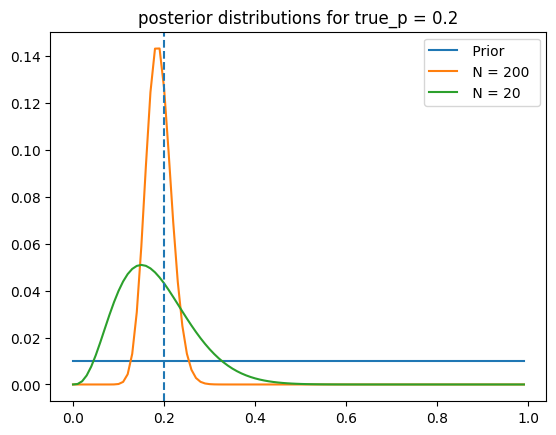

In [513]:
true_p = 0.2
data20  = create_data(true_p, 20)
data200 = create_data(true_p, 200)

plt.plot(p, prior, label= ' Prior ')
plt.plot(p, posterior(data200, p, prior), label = ' N = 200 ')
plt.plot(p, posterior(data20, p, prior), label = ' N = 20 ')
plt.axvline(true_p, linestyle = '--')
plt.legend(loc='upper right')
plt.title('posterior distributions for true_p = 0.2')
plt.show()
# plt.savefig('figs/more_data.png')

## 4. Bayesian updating

In this section we explore Bayesian updating. The idea is to use the calculated posterior for some inital observed data, and then set this as our new prior when awaiting for further data. In this way, we use our initial observations to update our expecations for future data, assuming we are still sampling from the same distribution (i.e. flipping same coin with `true_p`).

Assuming we start with a uniform initial prior, the updating process for updating data in batches $(D_1, D_2, \cdots)$ looks schematically as
$$ \pi_0(\theta) = \text{Uniform}(0,1) $$
$$\pi_1(\theta) \leftarrow P (\theta | D_1)$$
$$\pi_2(\theta) \leftarrow P (\theta | D_2)$$

We can explore this updating process by writing a function using `create_data()` and then splitting this in multiple sets of data i.e. a dataset. 

e.g. `data = [True, False, False, True] -> dataset = [[True, False], [False, True]]`

In [514]:
def create_dataset(true_p: float, N_flips: int, M_sets: int) -> list[np.array(bool)]:
    '''
    YOUR CODE HERE!
    '''

    return dataset

Next, we want to see what the posterior looks like after every batch of new data, using our new prior (the calculated posterior after the old set of data). 

To neatly package this into one function, we pass the dataset as a list of $M$ sets of data, and return out $M$ posteriors: $P_1(p | D_1), P_2(p | D_1 \cup D_2), \cdots, P_M(p | D) $, where we are continuously updating the prior each time.


In [515]:
def bayes_update(dataset: list[np.array(bool)], theta: np.array(float), prior: np.array(float)) -> list[np.array(float)]:
    '''
    YOUR CODE HERE!
    '''
    
    return posts

Let's now plot a graph of all the posteriors as the data streams in. Your graph should look something like this

[image]

We also expect that repeatedly updating the posterior as new data comes in should still give the same final posterior as if we were to just perform a single inference on the whole dataset from the beginning.
$$P_M(p | D_1 \cup D_2 \cdots \cup D_M) = P(p | D)$$
And we should verify this is the case for our example

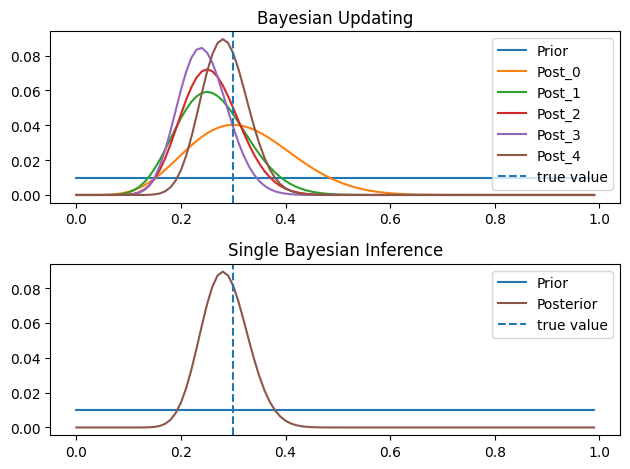

In [516]:
true_p = 0.3

dataset = create_dataset(true_p=true_p, N_flips=100, M_sets=5)
data = np.hstack(dataset)

posts = bayes_update(dataset, p, prior)
post = posterior(data, p, prior)

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(p, prior, label='Prior')
for i, post in enumerate(posts): 
    ax1.plot(p, post, label=r'Post_{}'.format(i))

ax2.plot(p, prior, label='Prior')
ax2.plot(p, post, c='tab:brown', label='Posterior')

ax2.axvline(true_p, linestyle = '--', label='true value')
ax1.axvline(true_p, linestyle = '--', label='true value')
ax1.legend()
ax2.legend()

ax1.set_title('Bayesian Updating')
ax2.set_title('Single Bayesian Inference')

fig.tight_layout()

#plt.show()
#plt.savefig('figs/bayesian_updating.png')

In [517]:
dataset = create_dataset(true_p=0.2, N_flips=100, M_sets=5)
data = np.hstack(dataset)

assert np.allclose(
    posterior(data, p, prior).astype('float'),
    bayes_update(dataset, p, prior)[-1]
)

Now we have developed a full workflow for tackling problems with bayesian inference. Let's explore a bit further by considering some non-uniform priors. Imagine now someone untrustworthy gives you a coin and won't tell you what it's bias is. However, lets say we think we know something about their personality that means they are more likely to give you a heads-biased coin. We can encode this 'guess' in our prior by saying the coin bias looks like a normal distribution $\pi(p) \sim N (\mu = p_{\mu}, \sigma = 0.1)$ with a mean favouring a heads-biased coin $p_{\mu} = 0.8$. 

[image]

Sticking with our coins in a bag analogy, imagine someone changes the bag so now there are multiple coins with the same bias. The distribution of biased coins is not uniform though, there are the most coins with bias $p = p_{\mu}$, and slightly less coins with bias less than $p_{\mu}$, and so on, such that the number of coins with bias $p$ goes like a normal distribution $ N(p) \sim N (\mu = p_{\mu}, \sigma = 0.1)$. In this case, our prior will look like a guassian distribution $\pi(p) \sim e^{-p^2}$. 

Let's repeat the above analysis using bayesian updating for 5 sets of data, now with this different prior and plot the similar graphs.

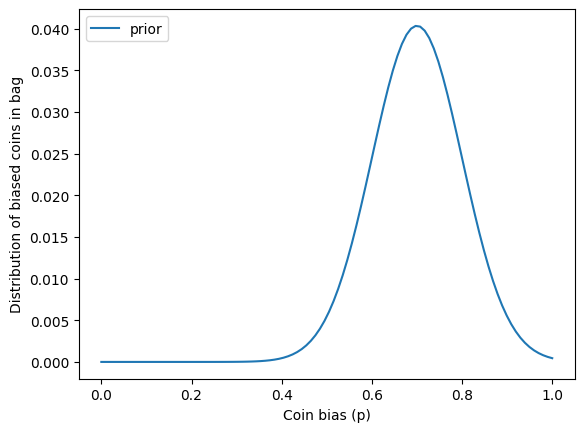

In [524]:
def gaussian(mu, sigma, x):
    pdf = np.exp( - (x - mu)**2 / (2*sigma**2))

    return pdf / np.sum(pdf)

p = np.linspace(0, 1, 100)
plt.plot(p, gaussian(0.7, 0.1, p), label='prior')
plt.xlabel('Coin bias (p)')
plt.ylabel('Distribution of biased coins in bag')
plt.legend(loc='upper left')
plt.show()
#plt.savefig('figs/guassian_prior.png')

## 5. Non-uniform priors 

The two interesting cases to look at are when our prior guess is right, such that $p_{\mu} \approx p_{\text{true}}$ and when our prior is very wrong, so we have been tricked and were given a coin with bias very different to what we thought. 

[image]

In the top graph we see when our prior is right, each of the updated posteriors rapidly converges to the true value, with a more spiked (confident) distribution. However, when we have been tricked and our prior is very wrong, the posteriors are 'dragged' away from our prior as more and more data flows in. This reflects the balance between our initial opinion that a coin with $p_{\text{true}}=0.1$ is very unlikely, combined with the fact that we keep flipping tails over and over. It is interesting to see that even for only $N=100$ flips total, the posterior has moved significantly away from the initial prior.

Choosing a good prior can become very important when working with more complicated models. For example, in a 100-dimensional bayesian inference, the volume of posterior space to explore becomes huge and the process of converging our prior onto the true posterior becomes exponentially slower. Therefore choosing a prior which is accurate can drastically reduce the amount of data and computational resources required.

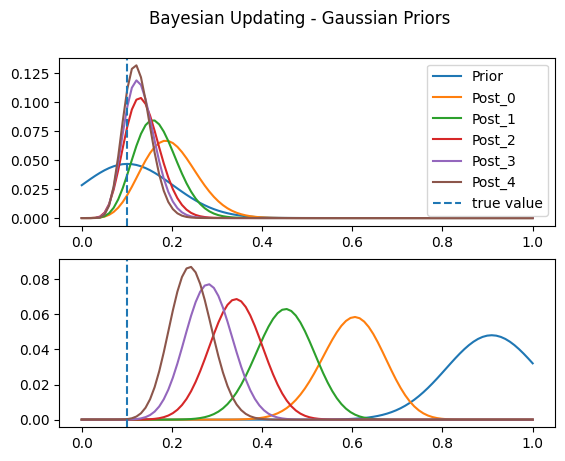

In [538]:
fig, (ax1, ax2) = plt.subplots(2)

true_p = 0.1

dataset = create_dataset(true_p = true_p, N_flips = 100, M_sets=5)

prior1 = np.linspace(0,0.99,100)
prior1 = gaussian(mu=true_p, sigma=0.1, x=prior1)
posts1 = bayes_update(dataset, p, prior1)

ax1.plot(p, prior1, label='Prior')
for i, post in enumerate(posts1): 
    ax1.plot(p, post, label=r'Post_{}'.format(i))

prior2 = np.linspace(0,0.99,100)
prior2 = gaussian(mu=1-true_p, sigma=0.1, x=prior2)
posts2 = bayes_update(dataset, p, prior2)

ax2.plot(p, prior2, label='Prior')
for i, post in enumerate(posts2): 
    ax2.plot(p, post, label=r'P_{}'.format(i))


ax2.axvline(true_p, linestyle = '--', label='true value')
ax1.axvline(true_p, linestyle = '--', label='true value')
ax1.legend()
fig.suptitle('Bayesian Updating - Gaussian Priors')

#plt.savefig('figs/non_uniform.png')
#plt.show()

In [7]:
# add in something here about a link to the solutions file by inputting some values to the final function of the notebook

## 6. Access to solutions

to access the solutions you will need to have completed the first three sections. 

Once you've done this, the password to the solutions doc can be obtained by running the `your_func()` function with the parameters below with a given seed. This will give you the password to the solutions notebooks with the link:

In [11]:
np.random.seed(seed=1)

N=100
data = np.where(np.random.random(N) < 0.5, True, False)
theta = np.linspace(0,0.99,N)
prior = np.ones(N) / N

posterior(data, theta, prior)

NameError: name 'posterior' is not defined